# 종합실습1 단변량 분석

# 1.비즈니스 시나리오

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

* 고객사는 카시트를 판매하는 회사 입니다.
    * 최근 매출 하락에 대해 각 부서가 파악한 원인 다음과 같습니다.
        * 최근에 경쟁사와의 가격 경쟁력이 하락하고 있고, 광고비용이 적절하게 집행되지 않음
        * 너무 국내 시장에 집중됨.
        * 지역마다의 구매력을 제대로 파악하지 못하고 있음.
    * 그러나 이러한 분석은 데이터에 근거하고 있는지 의문이 듭니다.

* 이 문제를 해결하고자 프로젝트 팀이 빌딩되었습니다.
    * 여러분은 이 프로젝트팀에 DX 컨설턴트로써 데이터분석을 맡았습니다.
    * 드디어 AIVLE 과정에서 갈고 닦은 실력을 발휘할 기회가 주어졌습니다.
    * 자, 이제 단변량 분석을 통해 비즈니스 인사이트를 도출해 봅시다!
----
* 반복되는 코드는 함수로 만듭시다!
    * 함수를 만드는 순서
        * 먼저 절차대로 코드를 작성해서 실행한다.
        * 실행된 코드(오류가 없는 코드)를 가져다 함수로 구성한다.
            * 입력과 출력 결정

# 2.환경준비

## (1) 라이브러리 불러오기

In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## (2) 데이터 로딩 : 카시트 판매량 데이터

|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	 경쟁사 가격(단위 : 달러)	|	feature	|
|	Income 	|	 지역 평균 소득(단위 : 1000달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	Urban 	|	 도심 지역 여부(Yes,No)	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(Yes,No)	|	feature	|


In [10]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats2.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


# 3.단변량분석 : 숫자형 변수

In [12]:
def eda_1_n(data, var, bins = 30) :
    print(data[[var]].describe().T)
    print()

    plt.figure(figsize = (6,8))
    plt.subplot(2,1,1)
    sns.histplot(x=data[var], bins = 20, kde = True)

    plt.subplot(2,1,2)
    sns.boxplot(x=data[var])

    plt.tight_layout()
    plt.show()

## (1) Sales (Target)

1) 변수의 비즈니스 의미

* 각 지역 판매량(단위 : 1000개)
* Target

2) 기초통계량 및 분포 확인

       count      mean       std  min   25%   50%   75%    max
Sales  400.0  7.496325  2.824115  0.0  5.39  7.49  9.32  16.27



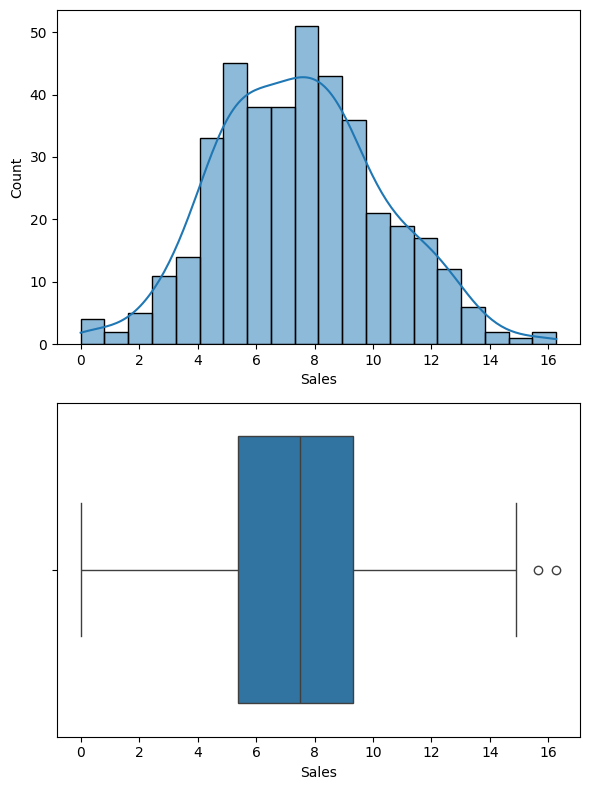

In [14]:
eda_1_n(data, 'Sales')

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 대부분의 판매량이 5천개 ~ 만개 사이

4) 추가 분석해 볼 사항이 있나요?

* 판매량 구간을 0 ~ 4천, 4천 ~ 1만, 1만 이상 으로 구분해서 분석해 볼 필요 있음.

* #### AIVLER의 의견
* 1.15~1.25만 달러에 전체 50%가 분포
* 

## (2) CompPrice

1) 변수의 비즈니스 의미

- 경쟁사 가격(단위 : 달러)
- feature

2) 기초통계량 및 분포 확인

           count     mean        std   min    25%    50%    75%    max
CompPrice  400.0  124.975  15.334512  77.0  115.0  125.0  135.0  175.0



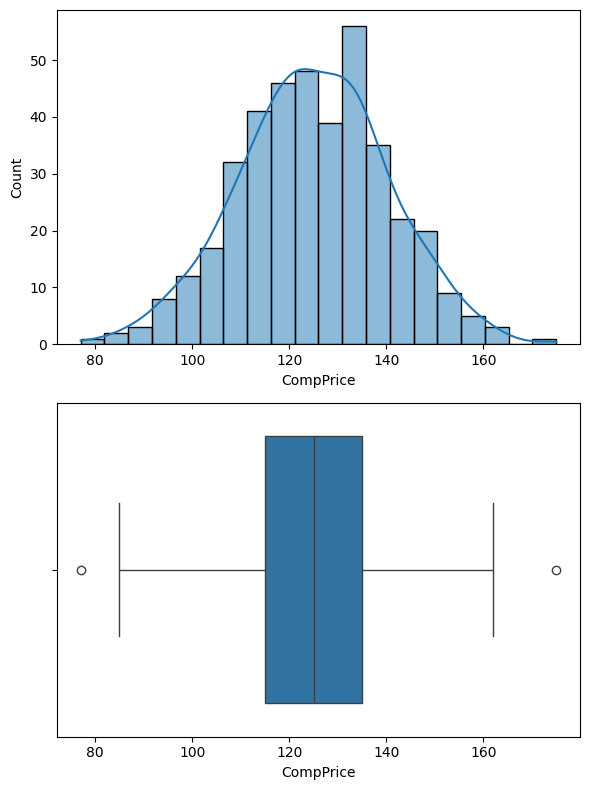

In [19]:
eda_1_n(data, 'CompPrice')

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

- 경쟁사 중에 극단적으로 낮은 이상치와 극단적으로 높은 이상치가 발견됨
- 경쟁사 가격은 110~ 130 달러로 분포해 있음  

4) 추가 분석해 볼 사항이 있나요?

## (3) Income

1) 변수의 비즈니스 의미

- 지역 평균 소득(단위 : 1000달러)
- feature

2) 기초통계량 및 분포 확인

        count     mean        std   min    25%   50%   75%    max
Income  400.0  68.6575  27.986037  21.0  42.75  69.0  91.0  120.0



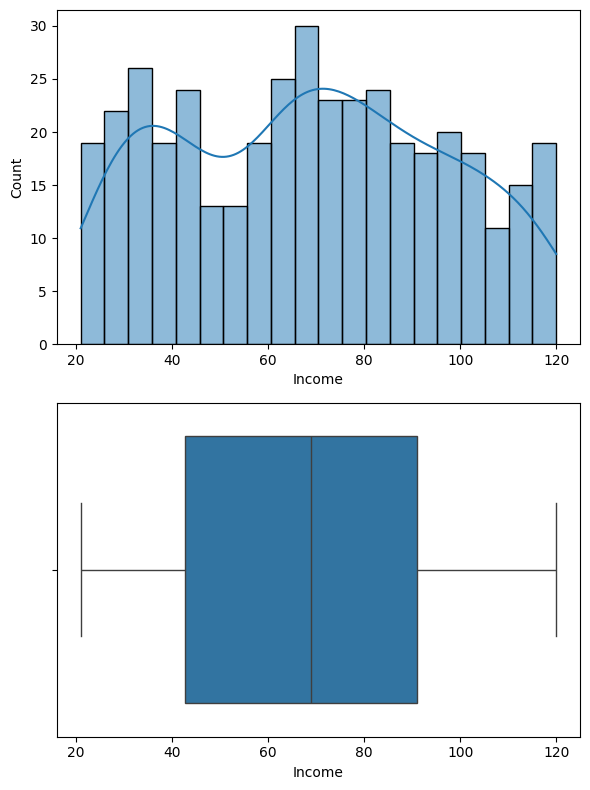

In [25]:
eda_1_n(data, 'Income')

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

- 수입들이 균일분포를 따르고 있는 것 같다  하지만 40~ 60 소득 분포가 낮은데  4만달러이하 / 6만달러 이상 매장의 특성을 조사할 필요가있음 

4) 추가 분석해 볼 사항이 있나요?

## (4) Advertising

1) 변수의 비즈니스 의미

In [ ]:
- 각 지역, 회사의 광고 예산(단위 : 1000달러)
- feature

2) 기초통계량 및 분포 확인

             count   mean       std  min  25%  50%   75%   max
Advertising  400.0  6.635  6.650364  0.0  0.0  5.0  12.0  29.0



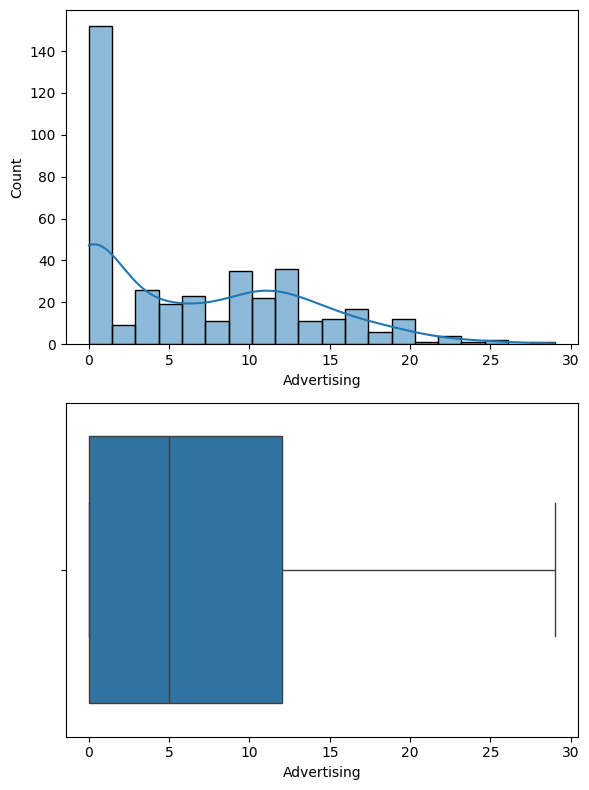

In [28]:
eda_1_n(data, 'Advertising')

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

In [ ]:
- 대다수의 지역에 광고예산에 1만달러 이하로 사용하고 있음 , 대부분 5천 달러 이하의 광고비용을 지출 

4) 추가 분석해 볼 사항이 있나요?

## (5) Population

1) 변수의 비즈니스 의미

- 지역 인구수(단위 : 1000명)
- feature	

2) 기초통계량 및 분포 확인

            count    mean         std   min    25%    50%    75%    max
Population  400.0  264.84  147.376436  10.0  139.0  272.0  398.5  509.0



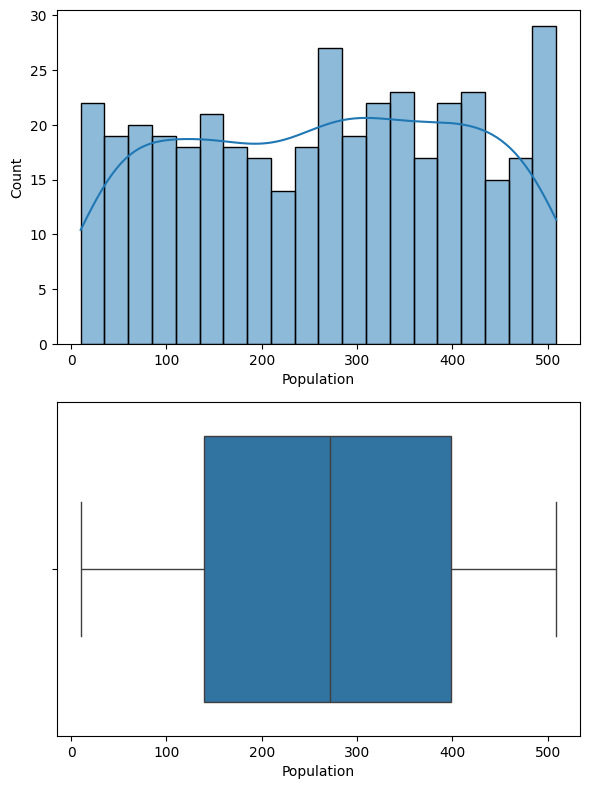

In [33]:
eda_1_n(data, 'Population')

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

In [ ]:
- 지역별로 

4) 추가 분석해 볼 사항이 있나요?

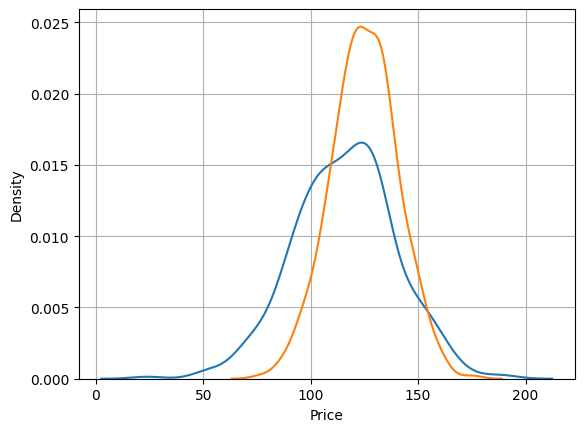

In [59]:
# 자사 가격 vs 타사 가격 비교 
sns.kdeplot(x ='Price',data = data)
sns.kdeplot(x ='CompPrice',data = data)

plt.grid()
plt.show()

## (6) Price

1) 변수의 비즈니스 의미

- 자사 지역별 판매가격

2) 기초통계량 및 분포 확인

       count     mean        std   min    25%    50%    75%    max
Price  400.0  115.795  23.676664  24.0  100.0  117.0  131.0  191.0



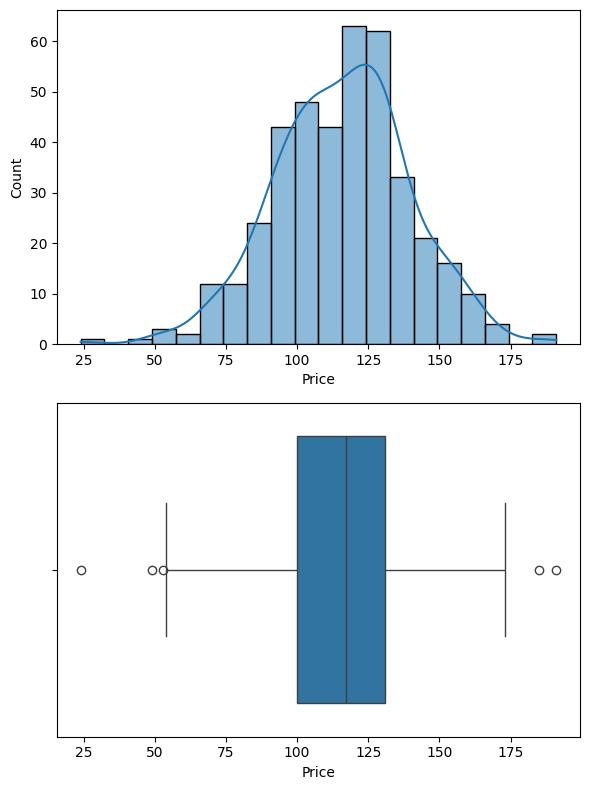

In [41]:
eda_1_n(data, 'Price')

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

4) 추가 분석해 볼 사항이 있나요?

## (7) Age

1) 변수의 비즈니스 의미

- 지역 인구의 평균 연령

2) 기초통계량 및 분포 확인

     count     mean        std   min    25%   50%   75%   max
Age  400.0  53.3225  16.200297  25.0  39.75  54.5  66.0  80.0



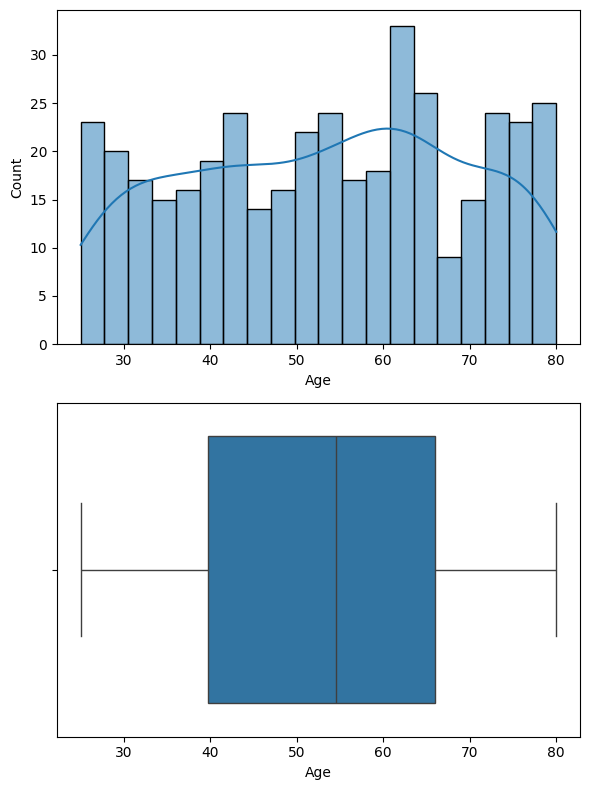

In [48]:
eda_1_n(data, 'Age')

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

In [ ]:
- 초혼 평균나이가 28~30인 것을 감안하면 유아용 카시트 구매자는 35~45가 가장 많은 지역에서에 판매량이 높을 것(가설1)

- 카시트를 구매하는 지역 평균 연령은 40~60대에 많이 분포, 특히 60세 이상(실제 관측)

- 전세계적 고령인구 증가와 '실버 세대의 육아' 가 널리 확산되었기에  50~60세 카시트 구매 분포가 많은것(새로운 가설)

4) 추가 분석해 볼 사항이 있나요?

전 세계적으로 할아버지·할머니 인구가 15억명을 넘어서며 
조부모가 손주들을 돌보는 ‘실버 세대의 육아’가 널리 확산되고 있다.
맞벌이·한부모 가정 증가, 저출산으로 인한 한 자녀 시대,
평균 수명 증가에 따른 고령 인구 증가 등이 맞물리면서 
각국에서 ‘할마(할머니+엄마)·할빠(할아버지+아빠) 육아’가 보편화되고 있다.

출처: https://www.chosun.com/economy/weeklybiz/2023/04/27/PTWEX7XPXVDFNGSYRFKJAD4K4A/ 

# 4.단변량분석 : 범주형 변수

In [21]:
# 범주형 변수에 대한 단변량 분석 함수
def eda_1_c(data, var) :
    # 기초 통계량
    print(f' <<<  {var}   >>')
    cnt = data[var].value_counts()
    prop = data[var].value_counts()/data.shape[0]
    temp = pd.DataFrame({'Class':cnt.index, 'Count':cnt.values, 'Prop':prop.values})
    display(temp)
    # 시각화
    sns.countplot(x = var, data = data)
    plt.grid()
    plt.show()

## (1) Urban

1) 변수의 비즈니스 의미

* 도심 지역 여부

2) 기초통계량 및 분포 확인

 <<<  Urban   >>


,Class,Count,Prop
0,Yes,282,0.705
1,No,118,0.295


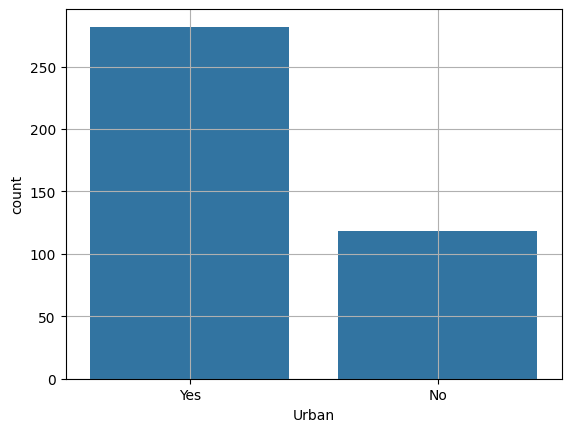

In [23]:
var = 'Urban'
eda_1_c(data, var)

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 약 70% 매장이 도시에 있음
* 도심은 인건비 건물비용 등 소비할게 많지만 고객 이용이 많아 매출은 높을 것으로 예측 

4) 추가 분석해 볼 사항이 있나요?

* 도시와 지방의 인구수, 소득수준, 자사 가격, 경쟁사 가격, 광고예산, 판매량 비교 필요.

## (2) ShelveLoc

1) 변수의 비즈니스 의미

- 진열상태

2) 기초통계량 및 분포 확인

 <<<  ShelveLoc   >>


,Class,Count,Prop
0,Medium,219,0.5475
1,Bad,96,0.2400
2,Good,85,0.2125


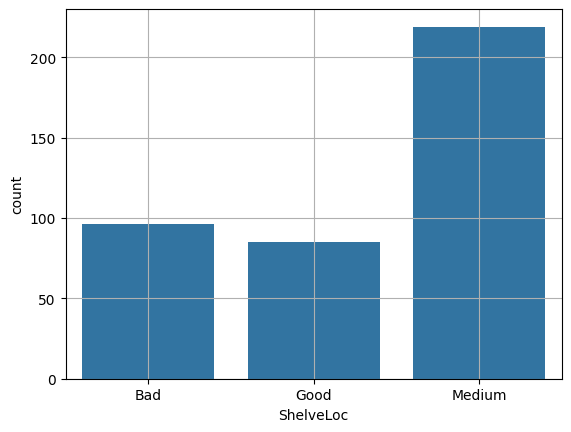

In [50]:
var = 'ShelveLoc'
eda_1_c(data, var)

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

In [ ]:
# 진열상태는 전반적으로 평균 , 나쁜 진열상태를 개선하면 손님의 이목을 끌 수 있을것

4) 추가 분석해 볼 사항이 있나요?

## (3) US

1) 변수의 비즈니스 의미

- 매장이 미국에 있는지 여부(Yes,No)

2) 기초통계량 및 분포 확인

 <<<  US   >>


,Class,Count,Prop
0,Yes,258,0.645
1,No,142,0.355


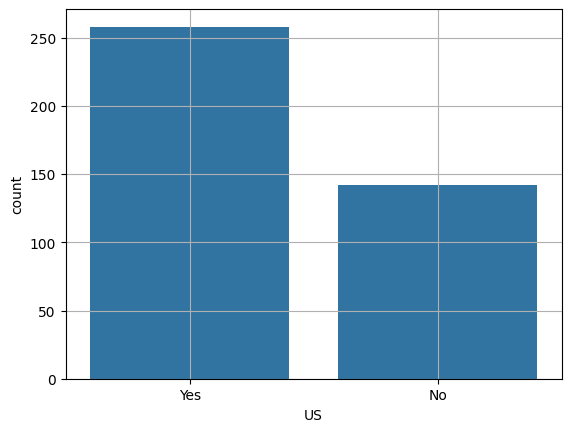

In [53]:
var = 'US'
eda_1_c(data, var)

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

- 미국은 만 15살 부터 면허를 딸 수 있고 개인 자가용 차 구매량이 높은 국가이다. 그만큼 미국 카시트 수요는 많을 것



4) 추가 분석해 볼 사항이 있나요?